In [7]:
import os, sys
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.constants import c as c_light

from wakis import SolverFIT3D
from wakis import GridFIT3D 
from wakis import WakeSolver

In [8]:
conductivities = [10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8]
nmesh = [1.25, 1.5, 2]
for cond in conductivities:
    print(f'Simulating with conductivity: {int(cond)}')
    print('-----------------------------------------')
    # ---------- Domain setup ---------
    # Number of mesh cells
    Nx = 60
    Ny = 60
    Nz = 150
    print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
    #dt = 5.707829241e-12 # CST

    # Embedded boundaries
    stl_cavity = 'cavity.stl' 
    stl_shell = 'shell.stl'
    surf = pv.read(stl_shell)
    
    stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
    stl_materials = {'cavity': 'vacuum', 'shell': [cond, 1.0, cond]}
    
    # Domain bounds
    xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
    Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)
    
    # set grid and geometry
    grid = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                    stl_solids=stl_solids, 
                    stl_materials=stl_materials)
        
    # ------------ Beam source ----------------
    # Beam parameters
    sigmaz = 5e-2       #[m] -> 2 GHz
    q = 1e-9            #[C]
    beta = 1.0          # beam beta TODO
    xs = 0.             # x source position [m]
    ys = 0.             # y source position [m]
    xt = 0.             # x test position [m]
    yt = 0.             # y test position [m]
    # [DEFAULT] tinj = 8.53*sigmaz/c_light  # injection time offset [s] 
    
    # Simualtion
    wakelength = 100. #[m]
    add_space = 30   # no. cells

    results_folder = f'results_cond{int(cond)}_WL{int(wakelength)}_1.5pisqrt_Nz1.5/'
    wake = WakeSolver(q=q, sigmaz=sigmaz, beta=beta,
                xsource=xs, ysource=ys, xtest=xt, ytest=yt,
                add_space=add_space, results_folder=results_folder,
                Ez_file=results_folder+'Ez.h5')
    
    # ----------- Solver & Simulation ----------
    # boundary conditions``
    bc_low=['pec', 'pec', 'pec']
    bc_high=['pec', 'pec', 'pec']
    
    solver = SolverFIT3D(grid, wake,
                         bc_low=bc_low, bc_high=bc_high, 
                         use_stl=True, 
                         use_gpu=True,
                         bg='pec')
    
    # Run wakefield time-domain simulation
    solver.wakesolve(wakelength=wakelength)

Simulating with conductivity: 10
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.410428524017334 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:43<00:00, 238.69it/s]


Reading h5 file results_cond10_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [03:56<00:00, 3098.18it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:10<00:00, 73059.62it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.26446795463562 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:39<00:00, 241.32it/s]


Reading h5 file results_cond100_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [04:13<00:00, 2885.68it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:10<00:00, 71959.39it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 1000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.0280566215515137 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:36<00:00, 243.44it/s]


Reading h5 file results_cond1000_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [03:45<00:00, 3244.58it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:09<00:00, 74428.72it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 10000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.006082773208618 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:41<00:00, 239.76it/s]


Reading h5 file results_cond10000_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [03:44<00:00, 3257.60it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:10<00:00, 70915.16it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.1392858028411865 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:40<00:00, 240.37it/s]


Reading h5 file results_cond100000_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [03:57<00:00, 3079.28it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:10<00:00, 72683.88it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 1000000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 1.9235398769378662 s
Running electromagnetic time-domain simulation...


100%|██████████| 81940/81940 [05:45<00:00, 237.32it/s]


Reading h5 file results_cond1000000_WL100_pisqrt_Nxy1.5/Ez.h5
Calculating longitudinal wake potential WP(s)


100%|██████████| 731961/731961 [03:57<00:00, 3084.46it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:10<00:00, 70681.23it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 10000000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 2.0831336975097656 s
Running electromagnetic time-domain simulation...


100%|██████████| 731961/731961 [03:36<00:00, 3384.94it/s] 


Calculating transverse wake potential WPx, WPy...


100%|██████████| 731961/731961 [00:09<00:00, 73493.05it/s] 


Calculating longitudinal impedance Z...
Calculating transverse impedance Zx, Zy...
Simulating with conductivity: 100000000
-----------------------------------------
Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...
Assembling operator matrices...
Applying boundary conditions...
Adding material tensors...
Calculating maximal stable timestep...
Pre-computing...
Moving to GPU...
Total initialization time: 1.9329769611358643 s
Running electromagnetic time-domain simulation...


 74%|███████▍  | 60846/81940 [04:18<01:24, 250.23it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



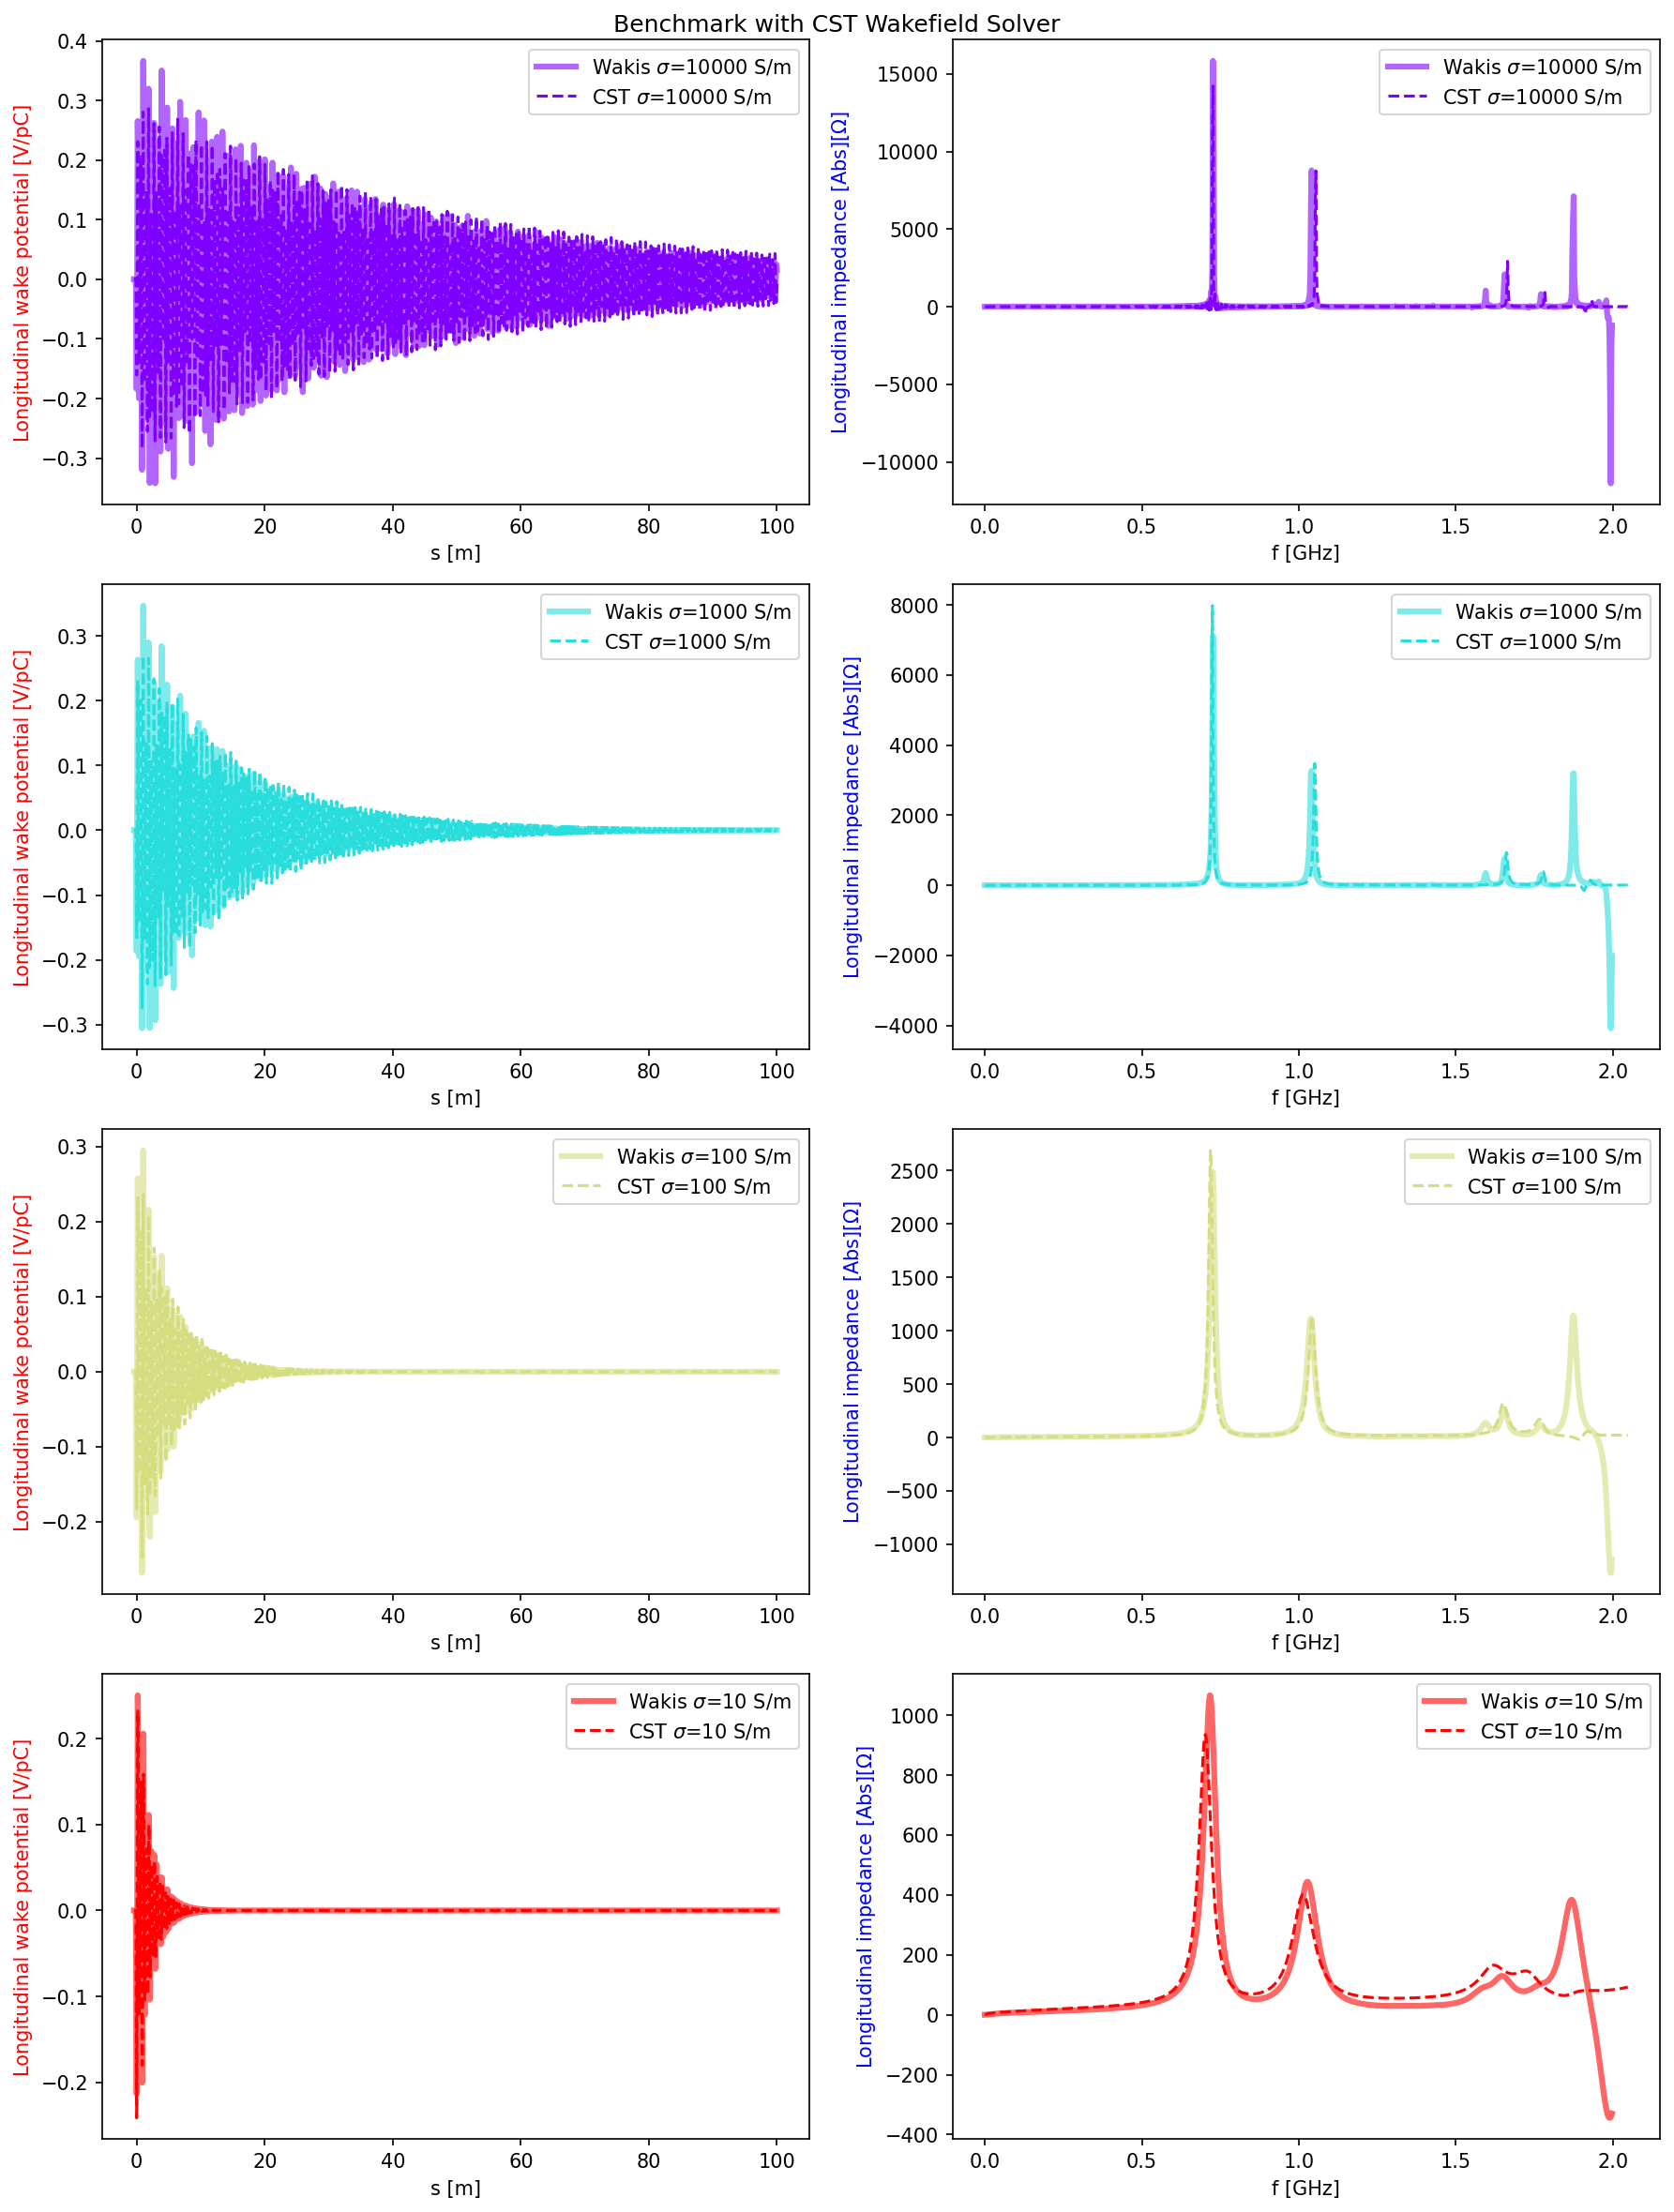

In [90]:
# Compare with CST
import matplotlib as mpl

wake = WakeSolver()
conds = [10, 100, 1000, 10000,] #100000, 1000000]
res = {}
cstWP, cstZ = {}, {}
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
fig, ax = plt.subplots(len(conds),2, figsize=[12,4*len(conds)], dpi=150)
res_folder = '_WL100_Z0'

for k, cond in enumerate(reversed(conds)):
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}'+res_folder+'/')
    cstWP[k] = wake.read_txt(f'cst/WP_sigma{cond}.txt')
    cstZ[k] = wake.read_txt(f'cst/Z_sigma{cond}.txt')

    ax[k][0].plot(res[k].s, res[k].WP, c=colors[k], lw=3, alpha=0.6, label=f'Wakis $\sigma$={cond} S/m')
    ax[k][0].plot(cstWP[k][0]*1e-2, cstWP[k][1], c=colors[k], ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')

    ax[k][1].plot(res[k].f*1e-9, res[k].Z.real, c=colors[k], lw=3, alpha=0.6, label=f'Wakis $\sigma$={cond} S/m')
    ax[k][1].plot(cstZ[k][0], cstZ[k][1].real, c=colors[k], ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')

    ax[k][0].set_xlabel('s [m]')
    ax[k][0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[k][0].legend()
    
    ax[k][1].set_xlabel('f [GHz]')
    ax[k][1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[k][1].legend()


fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig(f'benchmark{res_folder}.png')


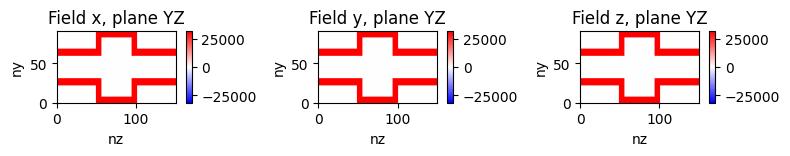

In [15]:
solver.sigma.inspect()

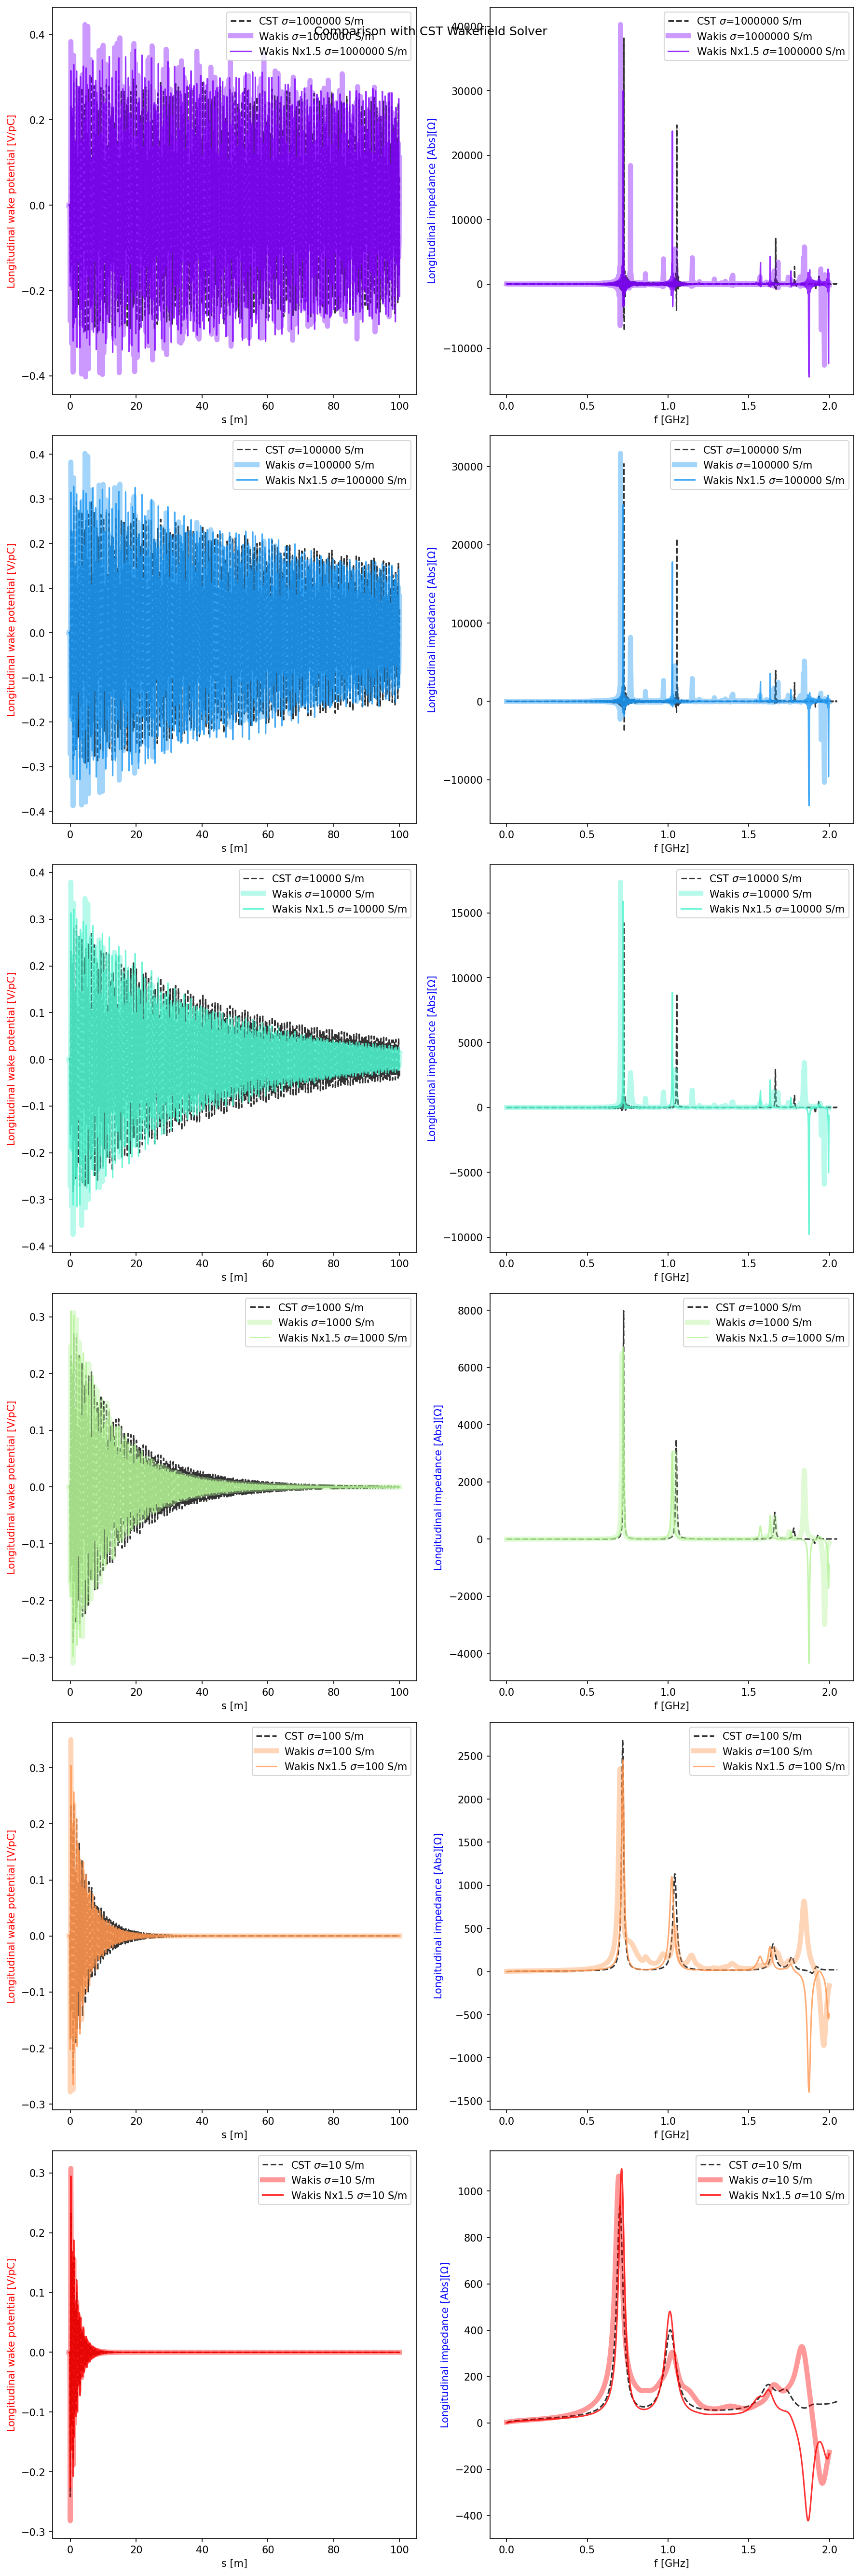

In [20]:
# Compare with Wakis
import matplotlib as mpl

wake = WakeSolver()
conds = [10, 100, 1000, 10000, 100000, 1000000]
res = {}
res2 = {}
cstWP, cstZ = {}, {}
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
fig, ax = plt.subplots(len(conds),2, figsize=[12,6*len(conds)], dpi=150)
res_folder = '_WL100_pisqrt_Nz1.5'

for k, cond in enumerate(reversed(conds)):
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}_WL100_pisqrt_Nxy1.5/')

    res2[k] = wake.copy()
    res2[k].load_results(f'results_cond{cond}{res_folder}/')
    
    cstWP[k] = wake.read_txt(f'cst/WP_sigma{cond}.txt')
    cstZ[k] = wake.read_txt(f'cst/Z_sigma{cond}.txt')

    ax[k][0].plot(cstWP[k][0]*1e-2, cstWP[k][1], c='k', ls='--', lw=1.5, alpha=0.8, label=f'CST $\sigma$={cond} S/m')
    ax[k][0].plot(res[k].s, res[k].WP, c=colors[k], lw=5, alpha=0.4, label=f'Wakis $\sigma$={cond} S/m')
    ax[k][0].plot(res2[k].s, res2[k].WP, c=colors[k], ls='-', lw=1.5, alpha=0.8, label=f'Wakis Nx1.5 $\sigma$={cond} S/m')

    ax[k][1].plot(cstZ[k][0], cstZ[k][1], c='k', ls='--', lw=1.5, alpha=0.8, label=f'CST $\sigma$={cond} S/m')
    ax[k][1].plot(res[k].f*1e-9, res[k].Z.real, c=colors[k], lw=5, alpha=0.4, label=f'Wakis $\sigma$={cond} S/m')
    ax[k][1].plot(res2[k].f*1e-9, res2[k].Z.real, c=colors[k], ls='-', lw=1.5, alpha=0.8, label=f'Wakis Nx1.5 $\sigma$={cond} S/m')

    ax[k][0].set_xlabel('s [m]')
    ax[k][0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[k][0].legend()
    
    ax[k][1].set_xlabel('f [GHz]')
    ax[k][1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[k][1].legend()
    
fig.suptitle('Comparison with CST Wakefield Solver')
fig.tight_layout()
fig.savefig(f'comparison{res_folder}.png')


Cond = 1000000 -> Hilbert-estimated alpha = 0.002
Cond = 100000 -> Hilbert-estimated alpha = 0.008
Cond = 10000 -> Hilbert-estimated alpha = 0.026
Cond = 1000 -> Hilbert-estimated alpha = 0.070
Cond = 100 -> Hilbert-estimated alpha = 0.220
Cond = 10 -> Hilbert-estimated alpha = 0.450


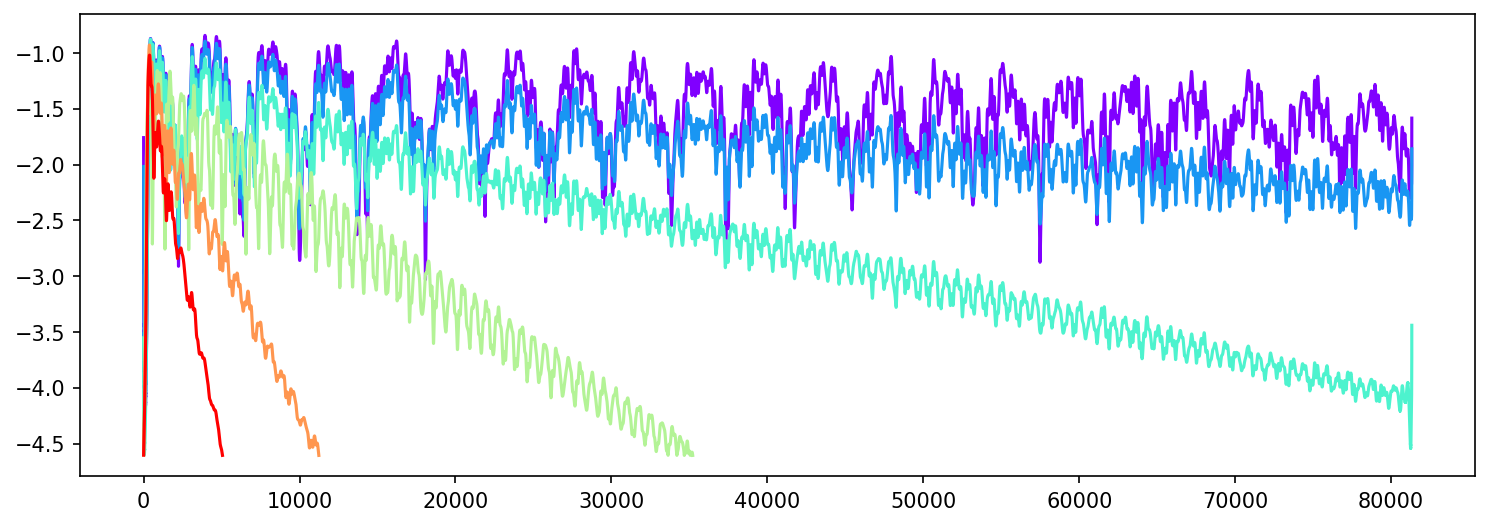

In [19]:
from scipy.signal import hilbert
import matplotlib as mpl

wake = WakeSolver()
conds = [10, 100, 1000, 10000, 100000, 1000000]
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
fig, ax = plt.subplots(1,1, figsize=[12,4], dpi=150)
alphas = []
res = {}
for k, cond in enumerate(reversed(conds)): 
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}_WL100_pisqrt_Nxy1.5/')

    analytic = hilbert(res[k].WP)
    envelope = np.abs(analytic)
    # Fit log envelope with straight line: log(env) ~ log(A) - alpha*t
    mask = envelope > 1e-2
    log_env = np.log(envelope[mask])
    coef = np.polyfit(res[k].s[mask], log_env, 1)
    alpha_hilbert = -coef[0]
    print(f"Cond = {cond} -> Hilbert-estimated alpha = {alpha_hilbert:.3f}")
    alphas.append(alpha_hilbert)
    
    ax.plot(log_env, color=colors[k], label=f'log(envelope) $\sigma$={cond} S/m')

fig.savefig('Wakis_alphas.png')


In [ ]:

conds = [10, 100, 1000, 10000, 100000, 1000000]
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(conds)))
fig, ax = plt.subplots(1,1, figsize=[12,4], dpi=150)
alphas_cst = []
cstWP = {}
for k, cond in enumerate(reversed(conds)): 
    cstWP[k] = wake.read_txt(f'cst/WP_sigma{cond}.txt')
    analytic = hilbert(cstWP[k][1])
    envelope = np.abs(analytic)
    # Fit log envelope with straight line: log(env) ~ log(A) - alpha*t
    mask = envelope > 1e-2
    log_env = np.log(envelope[mask])
    coef = np.polyfit(cstWP[k][0][mask]*1e-2, log_env, 1)
    alpha_hilbert = -coef[0]
    print(f"Cond = {cond} -> Hilbert-estimated alpha CST = {alpha_hilbert:.3f}")
    alphas_cst.append(alpha_hilbert)
    
    ax.plot(log_env, color=colors[k], label=f'log(envelope) $\sigma$={cond} S/m')

fig.savefig('CST_alphas.png')

In [ ]:
plt.plot(alphas, label='Wakis power')
plt.plot(alphas_cst, label='CST')
plt.legend()

In [ ]:
import matplotlib as mpl

wake = WakeSolver()
cond = 100
Nzs = [1, 1.25, 1.5, 2]
cstWP = wake.read_txt(f'cst/WP_sigma{cond}.txt')
cstZ = wake.read_txt(f'cst/Z_sigma{cond}.txt')
res = {}
colors = mpl.colormaps['rainbow'](np.linspace(0., 1.0, len(Nzs)))
fig, ax = plt.subplots(1,2, figsize=[12,6], dpi=150)

for k, Nz in enumerate(Nzs):
    res[k] = wake.copy()
    res[k].load_results(f'results_cond{cond}_WL100_Nz{Nz}/')

    ax[0].plot(cstWP[0]*1e-2, cstWP[1], c='k', ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')
    ax[0].plot(res[k].s, res[k].WP, c=colors[k], lw=3, alpha=0.5, label=f'Wakis Nz={Nz} S/m')

    ax[1].plot(cstZ[0], cstZ[1], c='k', ls='--', lw=1.5, label=f'CST $\sigma$={cond} S/m')
    ax[1].plot(res[k].f*1e-9, np.abs(res[k].Z), c=colors[k], lw=3, alpha=0.5, label=f'Wakis Nz={Nz} S/m')

    ax[0].set_xlabel('s [m]')
    ax[0].set_ylabel('Longitudinal wake potential [V/pC]', color='r')
    ax[0].legend()
    
    ax[1].set_xlabel('f [GHz]')
    ax[1].set_ylabel('Longitudinal impedance [Abs][$\Omega$]', color='b')
    ax[1].legend()
    
fig.suptitle('Benchmark with CST Wakefield Solver')
fig.tight_layout()
fig.savefig(f'benchmark_cond{cond}.png')


In [21]:
# ---------- Domain setup ---------
# Number of mesh cells
Nx = 60
Ny = 60
Nz = 150*1.5
print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
#dt = 5.707829241e-12 # CST

# Embedded boundaries
stl_cavity = 'cavity.stl' 
stl_shell = 'shell.stl'
surf = pv.read(stl_shell)

stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
stl_materials = {'cavity': 'vacuum', 'shell': [np.pi*np.sqrt(cond), 1.0, np.pi*np.sqrt(cond)]}

# Domain bounds
xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)

# set grid and geometry
grid = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                stl_solids=stl_solids, 
                stl_materials=stl_materials)

Total number of cells: 60x60x225.0 = 810000.0
Generating grid...
Importing STL solids...


In [22]:
print(grid.L[:, :, :, 'z'].min())
print(grid.L[:, :, :, 'x'].min())
print(1/grid.iA[:, :, :, 'x'].min())
print(1/grid.iA[:, :, :, 'z'].min())
print(1/grid.iA[:, :, :, 'z'].min()/grid.L[:, :, :, 'z'].min())
print(1/grid.iA[:, :, :, 'x'].min()/grid.L[:, :, :, 'x'].min())

0.0033777777353921623
0.006000000238418568
2.0266667217678757e-05
3.600000286102354e-05
0.010657895717594904
0.003377777735392304


In [24]:
# ---------- Domain setup ---------
# Number of mesh cells
Nx = 60
Ny = 60
Nz = 150
print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
#dt = 5.707829241e-12 # CST

# Embedded boundaries
stl_cavity = 'cavity.stl' 
stl_shell = 'shell.stl'
surf = pv.read(stl_shell)

stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
stl_materials = {'cavity': 'vacuum', 'shell': [np.pi*np.sqrt(cond), 1.0, np.pi*np.sqrt(cond)]}

# Domain bounds
xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)

# set grid and geometry
grid_0 = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                stl_solids=stl_solids, 
                stl_materials=stl_materials)

Total number of cells: 60x60x150 = 540000
Generating grid...
Importing STL solids...


In [21]:
print(grid_0.L[:, :, :, 'z'].min())
print(grid_0.L[:, :, :, 'x'].min())
print(1/grid_0.iA[:, :, :, 'x'].min())
print(1/grid_0.iA[:, :, :, 'z'].min())
print(1/grid_0.iA[:, :, :, 'z'].min()/grid_0.L[:, :, :, 'z'].min())
print(1/grid_0.iA[:, :, :, 'x'].min()/grid_0.L[:, :, :, 'x'].min())

0.005066666603088299
0.006000000238418568
3.0400000826518138e-05
3.600000286102354e-05
0.007105263811729858
0.005066666603088457


In [66]:
grid_0.L[:, :, :, 'Abs'].min()/grid.L[:, :, :, 'Abs'].min()

1.0821204581444566

In [67]:
grid.iA[:, :, :, 'Abs'].min()/grid_0.iA[:, :, :, 'Abs'].min()

1.3861673057841395

In [68]:
(grid.L[:, :, :, 'Abs'].min()*grid.iA[:, :, :, 'Abs'].min())/(grid_0.L[:, :, :, 'Abs'].min()*grid_0.iA[:, :, :, 'Abs'].min())

1.2809731997499068

In [75]:
(grid.L[:, :, :, 'Abs'].min()*grid.iA[:, :, :, 'Abs'].min())/376.73031

1.8207518860045082

In [82]:
2*(grid_0.L[:, :, :, 'Abs'].min()*grid_0.iA[:, :, :, 'Abs'].min())/376.73031

2.519333497782967

In [88]:
4*np.pi*(grid_0.L[:, :, :, 'Abs'].min()*grid_0.iA[:, :, :, 'Abs'].min())/(mu_0*2e9)

2.6773878727832767

In [31]:
# ---------- Domain setup ---------
# Number of mesh cells
Nx = 60*1.5
Ny = 60*1.5
Nz = 150
print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
#dt = 5.707829241e-12 # CST

# Embedded boundaries
stl_cavity = 'cavity.stl' 
stl_shell = 'shell.stl'
surf = pv.read(stl_shell)

stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
stl_materials = {'cavity': 'vacuum', 'shell': [np.pi*np.sqrt(cond), 1.0, np.pi*np.sqrt(cond)]}

# Domain bounds
xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)

# set grid and geometry
grid_xy = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                stl_solids=stl_solids, 
                stl_materials=stl_materials)

Total number of cells: 90.0x90.0x150 = 1215000.0
Generating grid...
Importing STL solids...


In [63]:
grid_0.L[:, :, :, 'Abs'].min()/grid_xy.L[:, :, :, 'Abs'].min()

1.3013793432533343

In [64]:
grid_xy.iA[:, :, :, 'Abs'].min()/grid_0.iA[:, :, :, 'Abs'].min()

1.7289347734498444

In [69]:
(grid_xy.L[:, :, :, 'Abs'].min()*grid_xy.iA[:, :, :, 'Abs'].min())/(grid_0.L[:, :, :, 'Abs'].min()*grid_0.iA[:, :, :, 'Abs'].min())

1.3285402003751334

In [49]:
# ---------- Domain setup ---------
# Number of mesh cells
Nx = 60*1.5
Ny = 60*1.5
Nz = 150*1.5
print(f'Total number of cells: {Nx}x{Ny}x{Nz} = {Nx*Ny*Nz}')
#dt = 5.707829241e-12 # CST

# Embedded boundaries
stl_cavity = 'cavity.stl' 
stl_shell = 'shell.stl'
surf = pv.read(stl_shell)

stl_solids = {'cavity': stl_cavity, 'shell': stl_shell}
stl_materials = {'cavity': 'vacuum', 'shell': [np.pi*np.sqrt(cond), 1.0, np.pi*np.sqrt(cond)]}

# Domain bounds
xmin, xmax, ymin, ymax, zmin, zmax = surf.bounds
Lx, Ly, Lz = (xmax-xmin), (ymax-ymin), (zmax-zmin)

# set grid and geometry
grid_xyz = GridFIT3D(xmin, xmax, ymin, ymax, zmin, zmax, int(Nx), int(Ny), int(Nz), 
                stl_solids=stl_solids, 
                stl_materials=stl_materials)

Total number of cells: 90.0x90.0x225.0 = 1822500.0
Generating grid...
Importing STL solids...


In [61]:
grid_0.L[:, :, :, 'Abs'].min()/grid_xyz.L[:, :, :, 'Abs'].min()

1.5000000000000095

In [62]:
grid_xyz.iA[:, :, :, 'Abs'].min()/grid_0.iA[:, :, :, 'Abs'].min()

2.25

In [70]:
(grid_xyz.L[:, :, :, 'Abs'].min()*grid_xyz.iA[:, :, :, 'Abs'].min())/(grid_0.L[:, :, :, 'Abs'].min()*grid_0.iA[:, :, :, 'Abs'].min())

1.4999999999999902

In [83]:
from scipy.constants import mu_0

In [85]:
mu_0*2e9

2513.2741242399998